In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import os

In [2]:
os.chdir('C:\\Users\\alexx\\Documents\\thesis')
ibm = pd.read_excel('C:\\Users\\alexx\\Documents\\thesis\\raw data\\ibm_watson_nlu_taxonomy.xlsx')

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics')
folders = os.listdir()
for x in folders: exec(x + ' = pd.DataFrame()')
    
os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t0')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t0 = t0.append(df_temp)
    df_temp = [] 
t0 = t0.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t1')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t1 = t1.append(df_temp)
    df_temp = []
t1 = t1.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t2')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t2 = t2.append(df_temp)
    df_temp = []
t2 = t2.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t3')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t3 = t3.append(df_temp)
    df_temp = []
t3 = t3.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t4')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t4 = t4.append(df_temp)
    df_temp = []
t4 = t4.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t5')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t5 = t5.append(df_temp)
    df_temp = []
t5 = t5.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t6')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t6 = t6.append(df_temp)
    df_temp = []
t6 = t6.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t7')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t7 = t7.append(df_temp)
    df_temp = []
t7 = t7.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t8')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t8 = t8.append(df_temp)
    df_temp = []
t8 = t8.drop(['Unnamed: 0', 'score'], axis=1)

os.chdir('C:\\Users\\alexx\\Documents\\thesis\\raw data\\topics\\t9')
files = os.listdir()
for f in files:
    df_temp = pd.read_csv(f)
    df_temp['date'] = f[:10]
    t9 = t9.append(df_temp)
    df_temp = []
t9 = t9.drop(['Unnamed: 0', 'score'], axis=1)

result = t0.append([t1,t2,t3,t4,t5,t6,t7,t8,t9])
TOPICS = pd.crosstab(result.label,result.date).T

# 1 Comparison and Contrast: before and after the 1st case of CIVD-19 in Japan
data from 2009 to 2020-05-31

In [3]:
# Here, we need to find out the "splitting point"

col_name = ['2020-01-16'] # when the first case in Japan was reported 

for c in col_name:
    index_no = TOPICS.index.get_loc(c)
    print("Index of {} column in given dataframe is : {}".format(c, index_no))

Index of 2020-01-16 column in given dataframe is : 3566


## 1.1 Difference of Topic Coverage

In [4]:
# First, we calculate how many sub-categories in each level of categories in total.

df_bi = TOPICS.astype(bool).astype(int)

LABEL = df_bi.T
LABEL.reset_index(level=0, inplace=True)
LABEL[['L0','L1','L2','L3','L4','L5']] = LABEL.label.str.split('/',expand=True)
LABEL = LABEL.drop('L0', axis=1)

L1 = LABEL.set_index('L1')
L1 = L1.groupby(level="L1").sum().T

L2 = LABEL.set_index('L2')
L2 = L2.groupby(level="L2").sum().T

L3 = LABEL.set_index('L3')
L3 = L3.groupby(level="L3").sum().T

L4 = LABEL.set_index('L4')
L4 = L4.groupby(level="L4").sum().T

L1 = L1.fillna(0)
L2 = L2.fillna(0)
L3 = L3.fillna(0)
L4 = L4.fillna(0)

In [5]:
# Next, we calculate coverage of L1 topics

LEVEL1_count = pd.DataFrame(ibm['LEVEL_1'].value_counts())
RATIO1 = pd.concat([L1.T, LEVEL1_count], axis=1).T

# Here, we divide the data into two parts: before and afte 1st COVID-19 case in Japan

pre_JP_ratio1 = RATIO1.iloc[:3566, :] 
after_JP_ratio1 = RATIO1.iloc[3566:-1, :] 

pre_JP_ratio1.index = pre_JP_ratio1.index.str[5:]
pre_JP_ratio1 = pre_JP_ratio1.groupby(level=0).mean()
pre_JP_ratio1 = pre_JP_ratio1.rename(index=lambda x: '2020-'+x)
pre_JP_ratio1 = pre_JP_ratio1.iloc[:168,:].fillna(0) # cut the data to match the time period from "after" data.

In [6]:
# Now, we do the same thing for L2 categories

# We calculate coverage of L2 topics.
LEVEL2_count = pd.DataFrame(ibm['LEVEL_2'].value_counts())
RATIO2 = pd.concat([L2.T, LEVEL2_count], axis=1).T

# We divide the data into two parts: before and afte 1st COVID-19 case in Japan
pre_JP_ratio2 = RATIO2.iloc[:3566, :] 
after_JP_ratio2 = RATIO2.iloc[3566:-1, :] 

pre_JP_ratio2.index = pre_JP_ratio2.index.str[5:]
pre_JP_ratio2 = pre_JP_ratio2.groupby(level=0).mean()
pre_JP_ratio2 = pre_JP_ratio2.rename(index=lambda x: '2020-'+x)
pre_JP_ratio2 = pre_JP_ratio2.iloc[:168,:].fillna(0) # cut the data to match the time period from "after" data.

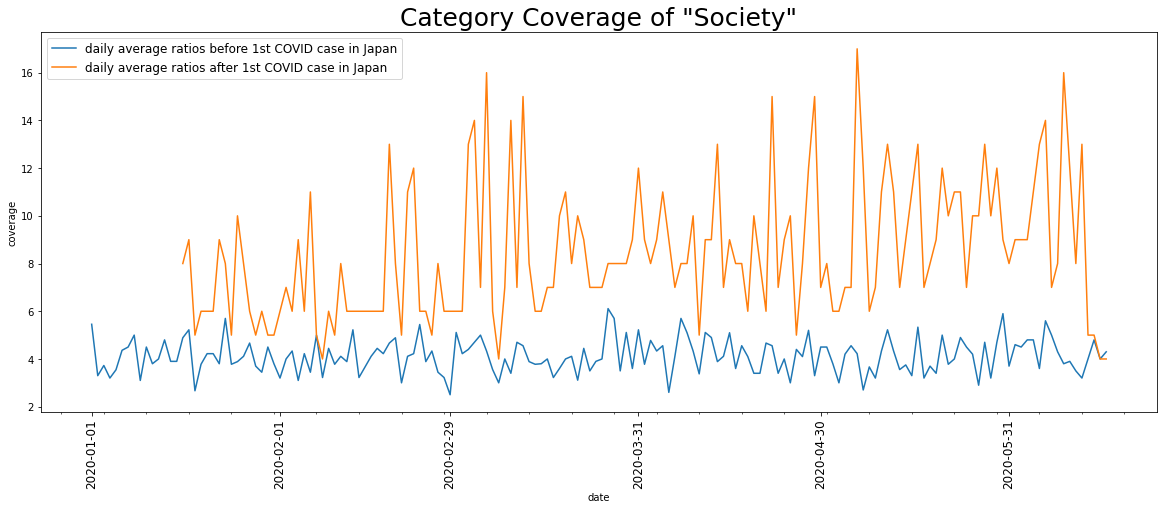

In [7]:
# Now, we plot th difference of "society"

fig, ax = plt.subplots(figsize=(20,7))

plt.plot(pre_JP_ratio1.index, pre_JP_ratio1['society'], 
         label = "daily average ratios before 1st COVID case in Japan")
plt.plot(after_JP_ratio1.index, after_JP_ratio1['society'], 
         label = "daily average ratios after 1st COVID case in Japan")

plt.xlabel('date', size=10)
plt.ylabel('coverage', size=10)
plt.title('Category Coverage of "Society"', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 12})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

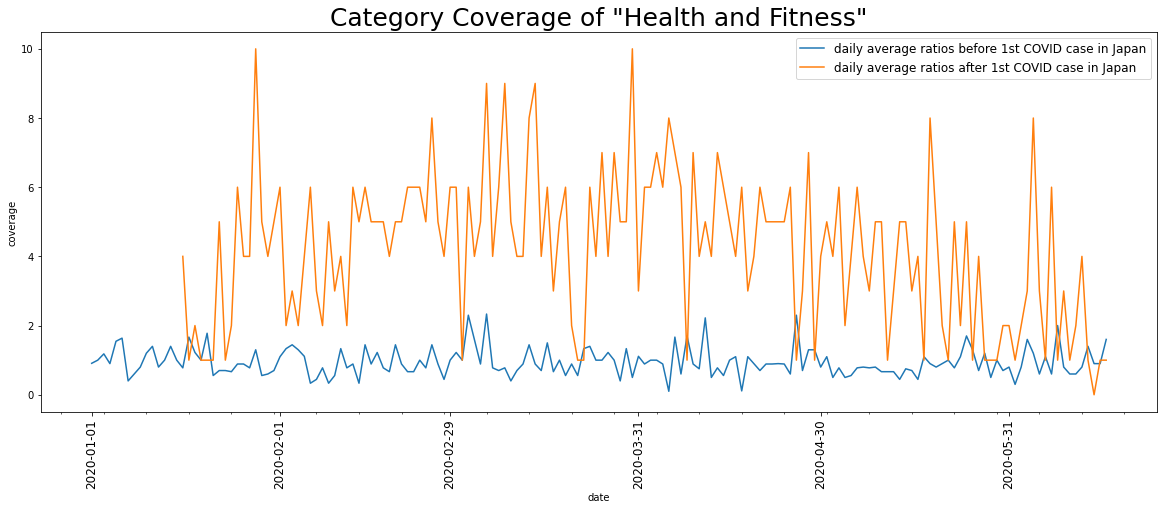

In [8]:
# Now, we plot th difference of "health and fitness"

fig, ax = plt.subplots(figsize=(20,7))

plt.plot(pre_JP_ratio1['health and fitness'], 
         label = "daily average ratios before 1st COVID case in Japan")
plt.plot(after_JP_ratio1['health and fitness'], 
         label = "daily average ratios after 1st COVID case in Japan")

plt.xlabel('date', size=10)
plt.ylabel('coverage', size=10)
plt.title('Category Coverage of "Health and Fitness"', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 12})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

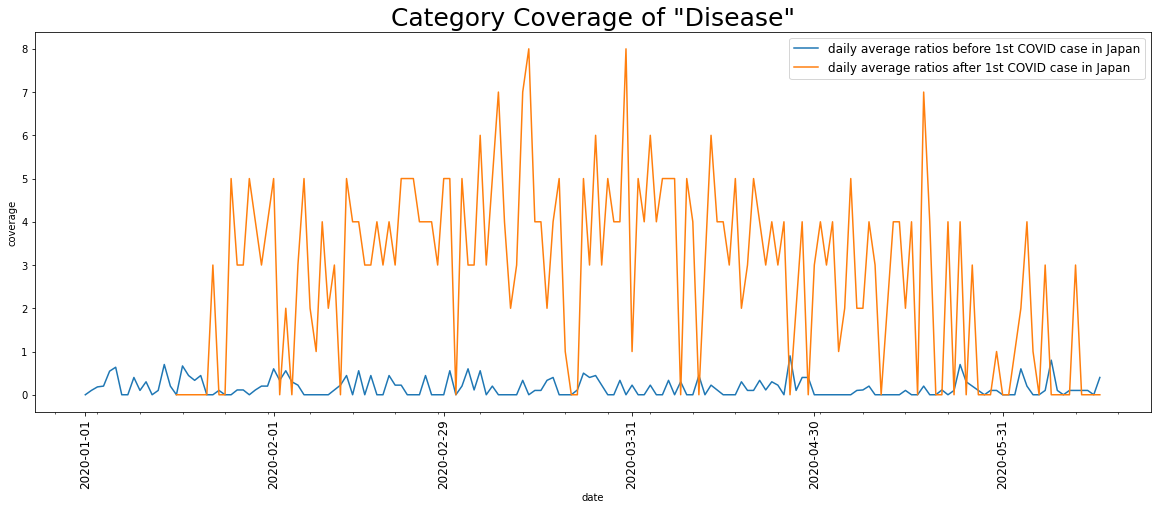

In [9]:
# Now, we plot th difference of "disease"

fig, ax = plt.subplots(figsize=(20,7))

plt.plot(pre_JP_ratio2['disease'], 
         label = "daily average ratios before 1st COVID case in Japan")
plt.plot(after_JP_ratio2['disease'], 
         label = "daily average ratios after 1st COVID case in Japan")

plt.xlabel('date', size=10)
plt.ylabel('coverage', size=10)
plt.title('Category Coverage of "Disease"', size=25)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 12})

fmt_month = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

## 1.2 Mean Topic Coverage

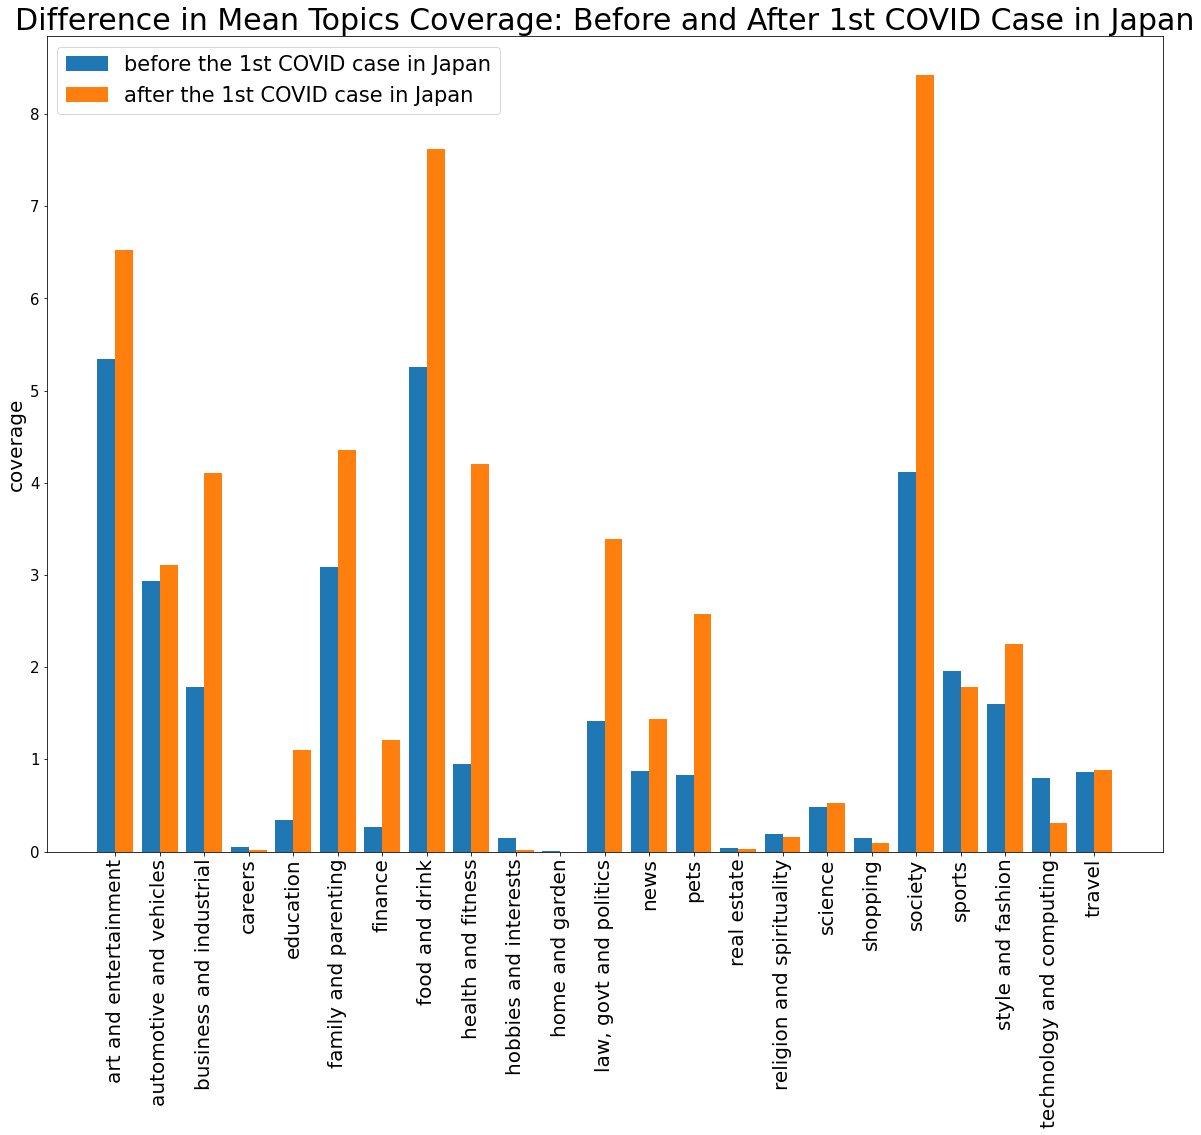

In [10]:
# First, we calculate mean values for each topic.
pre_JP_ratio1_mean = pd.DataFrame(pre_JP_ratio1.mean(), columns=['mean'])
after_JP_ratio1_mean = pd.DataFrame(after_JP_ratio1.mean(), columns=['mean'])

# Now, we plot bar charts to compare two mean values. 
fig, ax = plt.subplots(figsize=(20,15))
X = pre_JP_ratio1_mean.index
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, pre_JP_ratio1_mean['mean'], 0.4, label = 'before the 1st COVID case in Japan')
plt.bar(X_axis + 0.2, after_JP_ratio1_mean['mean'], 0.4, label = 'after the 1st COVID case in Japan')
  
plt.xticks(X_axis, X)
plt.xticks(fontsize=20, rotation ='vertical')
plt.yticks(fontsize=15)
plt.ylabel("coverage", size=20)
plt.title('Difference in Mean Topics Coverage: Before and After 1st COVID Case in Japan', size=30)
plt.legend(prop={'size': 21})
plt.show()

In [15]:
# Now, we calculate the difference of two mean values.
JP_ratio_diff1 = after_JP_ratio1.subtract(pre_JP_ratio1) # after - pre
JP_ratio_diff1_mean = pd.DataFrame(JP_ratio_diff1.mean(), columns=['mean'])
JP_ratio_diff1_mean.sort_values(by=['mean'], inplace=True, ascending=False)

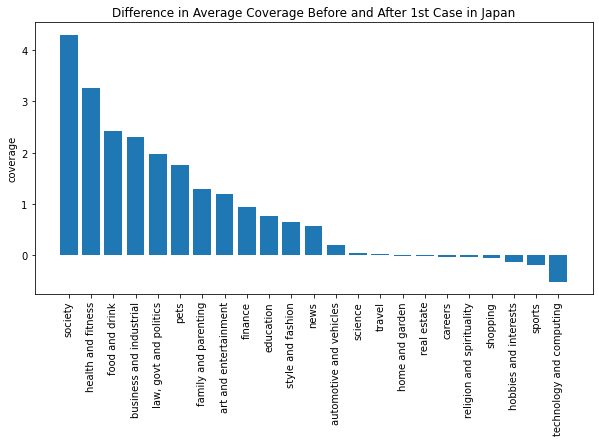

In [20]:
# Now, we plot the difference of two mean values. 
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(JP_ratio_diff1_mean.index,JP_ratio_diff1_mean['mean'])
plt.ylabel("coverage")
plt.title("Difference in Average Coverage Before and After 1st Case in Japan")
plt.xticks(fontsize=10, rotation ='vertical')
plt.show()

# 2 Visualization for Models 
data from 2019-12-01 to 2020-02-10

In [34]:
TOPICS = TOPICS.iloc[3520:3592,:] # 2019-12-01 2020-02-10

## 2.1 Topic "peaks"

In [35]:
# First, we calculate how many sub-categories in each level of categories in total.

df_bi = TOPICS.astype(bool).astype(int)

LABEL = df_bi.T
LABEL.reset_index(level=0, inplace=True)
LABEL[['L0','L1','L2','L3','L4','L5']] = LABEL.label.str.split('/',expand=True)
LABEL = LABEL.drop('L0', axis=1)

L1 = LABEL.set_index('L1')
L1 = L1.groupby(level="L1").sum().T

L2 = LABEL.set_index('L2')
L2 = L2.groupby(level="L2").sum().T

L3 = LABEL.set_index('L3')
L3 = L3.groupby(level="L3").sum().T

L4 = LABEL.set_index('L4')
L4 = L4.groupby(level="L4").sum().T

L1 = L1.fillna(0)
L2 = L2.fillna(0)
L3 = L3.fillna(0)
L4 = L4.fillna(0)

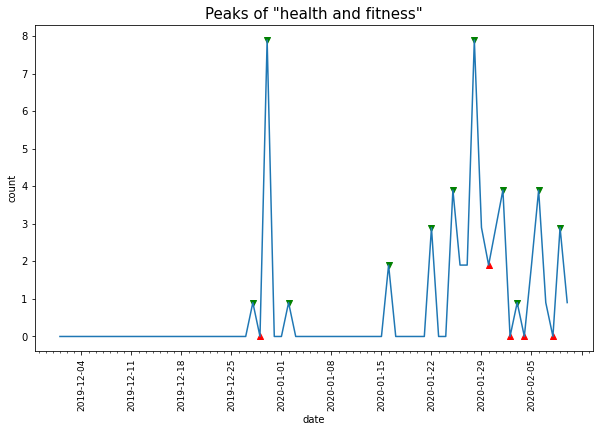

In [36]:
# Here, we plot the count of "health and fitness" and its peaks.

df_peaks1 = L1.fillna(0)

df_peaks1 = df_peaks1.sub(df_peaks1.mean(axis=0), axis=1)
df_peaks1[df_peaks1 < 0] = 0

df_peaks1.columns = df_peaks1.columns.str.replace(r"/", "_")
df_peaks1.columns = df_peaks1.columns.str.replace(r" ", "_")

# how to detect "peaks" 
cols = df_peaks1.columns.values.tolist()
for x in cols:
    df_peaks1['min_'+x] = df_peaks1[x][(df_peaks1[x].shift(1) > df_peaks1[x]) & (df_peaks1[x].shift(-1) > df_peaks1[x])]
    df_peaks1['max_'+x] = df_peaks1[x][(df_peaks1[x].shift(1) < df_peaks1[x]) & (df_peaks1[x].shift(-1) < df_peaks1[x])]

# plot results
fig, ax = plt.subplots(figsize=(10,6))

plt.scatter(df_peaks1.index, df_peaks1.min_health_and_fitness, c='r', marker="^")
plt.scatter(df_peaks1.index, df_peaks1.max_health_and_fitness, c='g', marker="v")
plt.plot(df_peaks1['health_and_fitness'])

plt.xlabel('date')
plt.ylabel('count')
plt.title('Peaks of "health and fitness"', size=15)
plt.xticks(fontsize=9, rotation ='vertical')

# change how date is displayed in the x-axis. Putting every date in there would make the graph too messy. 
fmt_day = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_day)
fmt_day2 = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day2)

plt.show()

## 2.2 Topic Coverage 

In [37]:
# We only calculate coverage for L1 & L2 because from L3, there is not much categories with sub-categories. No point of calculating coverage. 
# When building models, we did not include "coverage"; we only use "count", because coverage is just count divided by a same number. 
# But in the visualization part, we calculated "coverage" because it will be eaiser to compare multiple categories together. 

In [38]:
# First, we calculate coverage of L1 topics here.
# Coverage = topic count / total number of sub-categories in that L1 topic

LEVEL1_count = pd.DataFrame(ibm['LEVEL_1'].value_counts())
RATIO1 = pd.concat([L1.T, LEVEL1_count], axis=1)

# Delete columns containing either 95% or more NaN Values
RATIO1.replace(0, np.nan, inplace=True)
RATIO1 = RATIO1.T
perc = 95
min_count =  int(((100-perc)/100)*RATIO1.shape[0] + 1)
RATIO1 = RATIO1.dropna(axis=1, thresh=min_count)

RATIO1 = RATIO1.T

RATIO1 = RATIO1.iloc[:,:-1].div(RATIO1.LEVEL_1, axis=0).T
RATIO1 = RATIO1.replace([np.inf, -np.inf], np.nan)
RATIO1 = RATIO1.fillna(0)

In [39]:
# First, we calculate coverage of L2 topics here.
# Coverage = topic count / total number of sub-categories in that L2 topic

LEVEL2_count = pd.DataFrame(ibm['LEVEL_2'].value_counts())
RATIO2 = pd.concat([L2.T, LEVEL2_count], axis=1)

# Delete columns containing either 95% or more NaN Values
RATIO2.replace(0, np.nan, inplace=True)
RATIO2 = RATIO2.T
perc = 95
min_count =  int(((100-perc)/100)*RATIO2.shape[0] + 1)
RATIO2 = RATIO2.dropna(axis=1, thresh=min_count)

RATIO2 = RATIO2.T

RATIO2 = RATIO2.iloc[:,:-1].div(RATIO2.LEVEL_2, axis=0).T
RATIO2 = RATIO2.replace([np.inf, -np.inf], np.nan)
RATIO2 = RATIO2.fillna(0)

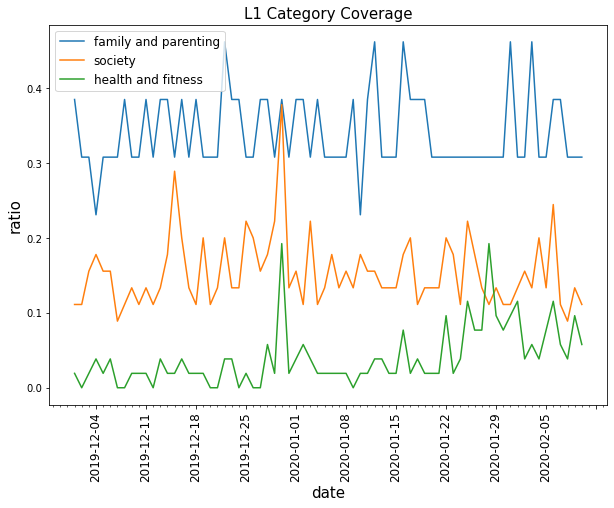

In [40]:
# Now we plot L1 topics.

fig, ax = plt.subplots(figsize=(10,7))

# Top 3 highest average ratio
plt.plot(RATIO1['family and parenting'],label = "family and parenting")
plt.plot(RATIO1['society'],label = "society")
plt.plot(RATIO1['health and fitness'],label = "health and fitness")

plt.xlabel('date', size=15)
plt.ylabel('ratio', size=15)
plt.title('L1 Category Coverage', size=15)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 12})

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

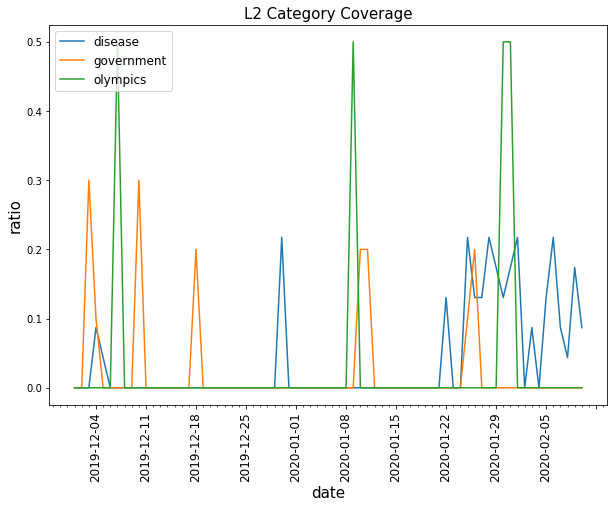

In [41]:
# Now we plot L2 topics.

fig, ax = plt.subplots(figsize=(10,7))

# Top 3 highest average ratio
plt.plot(RATIO2['disease'],label = "disease")
plt.plot(RATIO2['government'],label = "government")
plt.plot(RATIO2['olympics'],label = "olympics")

plt.xlabel('date', size=15)
plt.ylabel('ratio', size=15)
plt.title('L2 Category Coverage', size=15)
plt.xticks(fontsize=12, rotation ='vertical')
plt.legend(prop={'size': 12})

fmt_month = mdates.DayLocator(interval=7)
ax.xaxis.set_major_locator(fmt_month)
fmt_day = mdates.DayLocator(interval=1)
ax.xaxis.set_minor_locator(fmt_day)

plt.show()

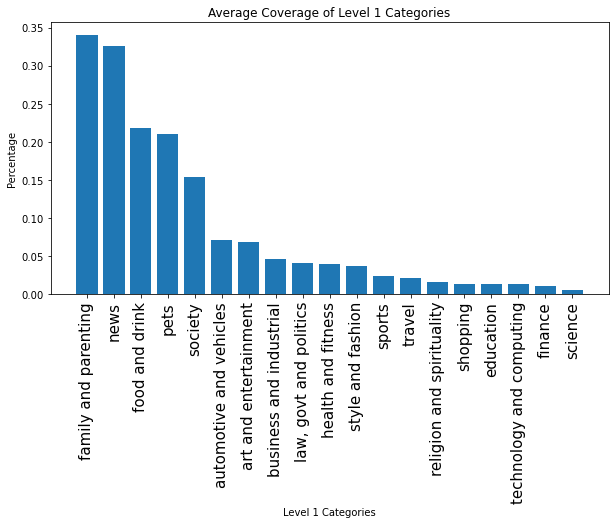

In [42]:
# Now, we calculate average L1 topic coverage and rank from the highest to the lowest.

RATIO1_mean = pd.DataFrame(RATIO1.mean())
RATIO1_mean.sort_values(by=[0], inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
plt.bar(RATIO1_mean.index,RATIO1_mean[0])
plt.xlabel("Level 1 Categories")
plt.ylabel("Percentage")
plt.title("Average Coverage of Level 1 Categories")
plt.xticks(fontsize=15, rotation ='vertical')
plt.show()

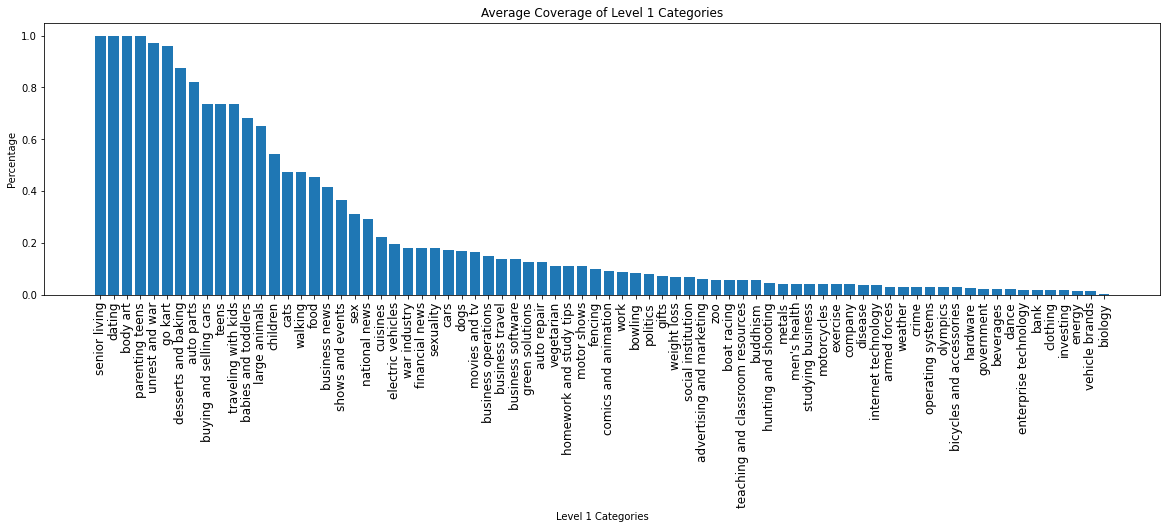

In [43]:
# Now, we calculate average L2 topic coverage and rank from the highest to the lowest.

RATIO2_mean = pd.DataFrame(RATIO2.mean())
RATIO2_mean.sort_values(by=[0], inplace=True, ascending=False)

fig, ax = plt.subplots(figsize=(20,5))
plt.bar(RATIO2_mean.index,RATIO2_mean[0])
plt.xlabel("Level 1 Categories")
plt.ylabel("Percentage")
plt.title("Average Coverage of Level 1 Categories")
plt.xticks(fontsize=12, rotation ='vertical')
plt.show()